In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16,ResNet50,DenseNet201
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Input
from keras.optimizers import RMSprop
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

**VISUALIZING THE DATASET**


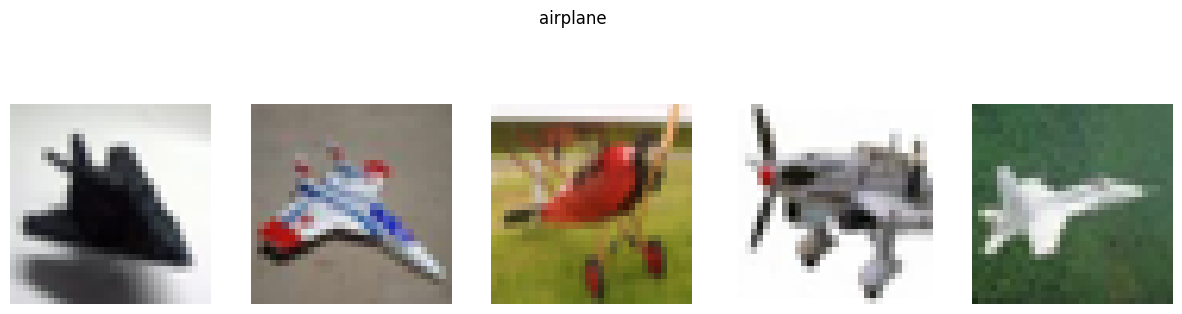

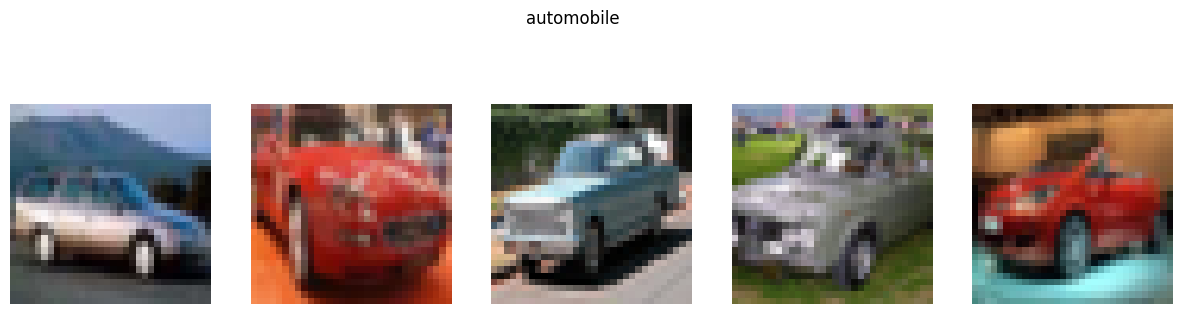

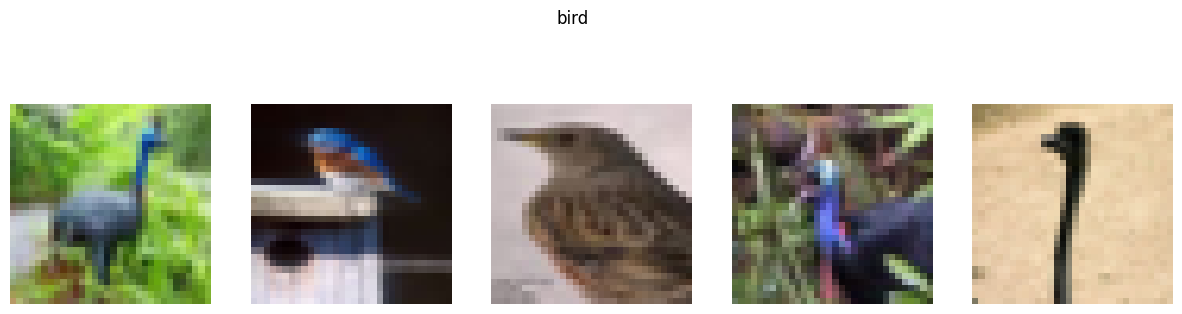

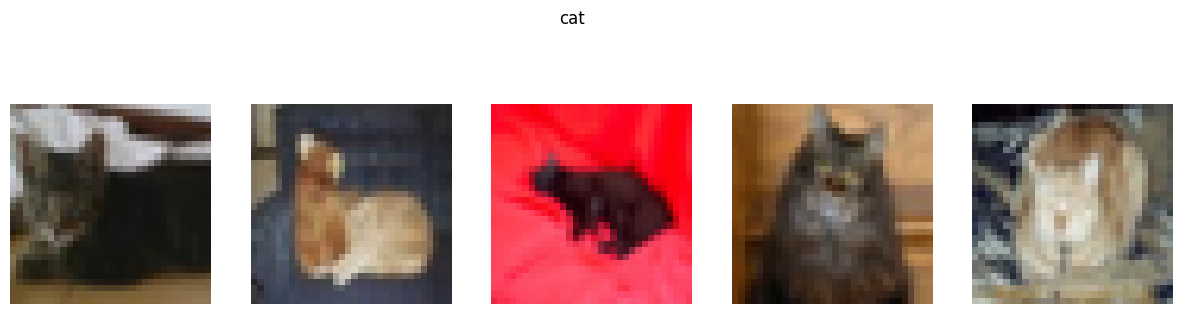

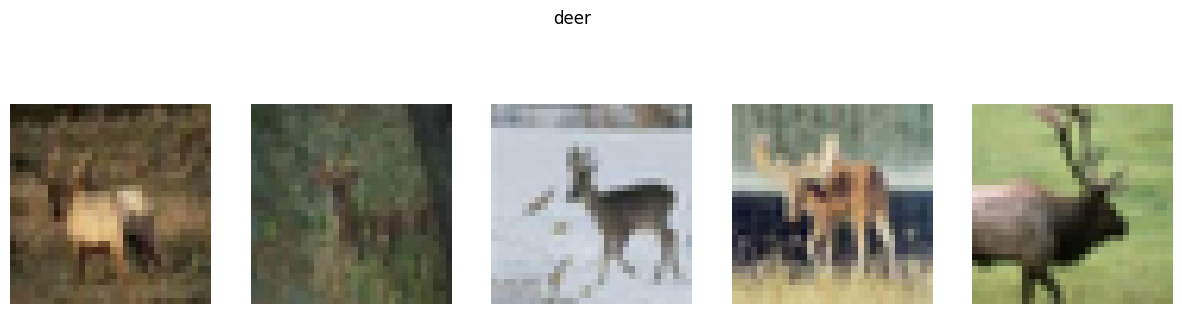

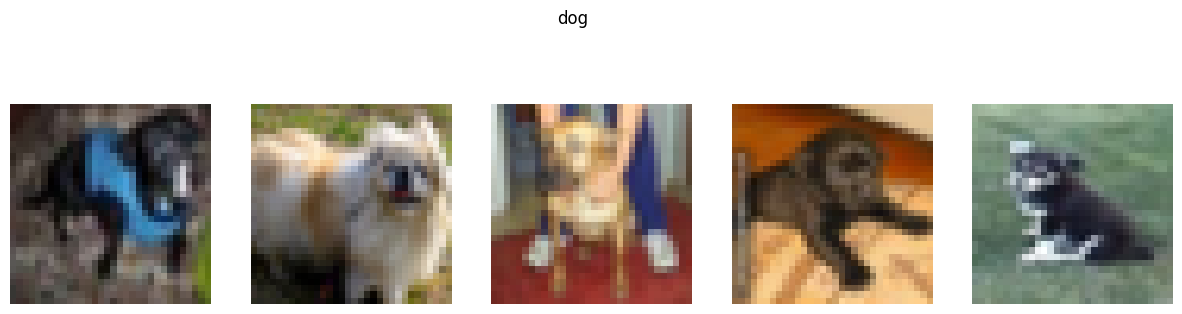

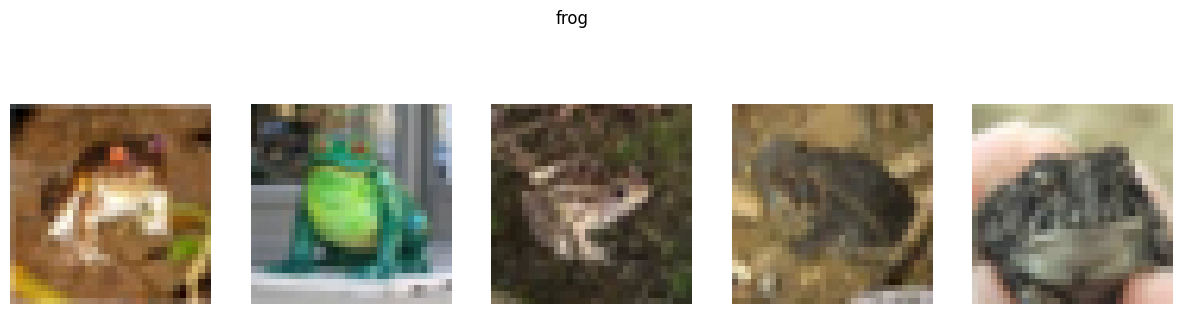

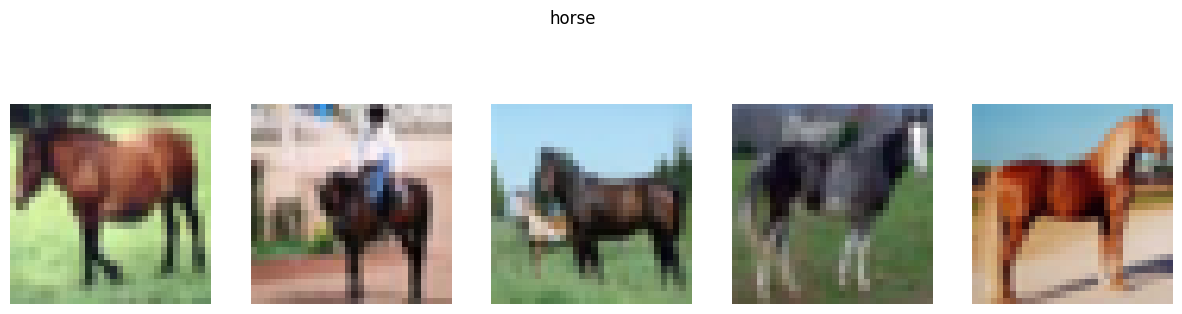

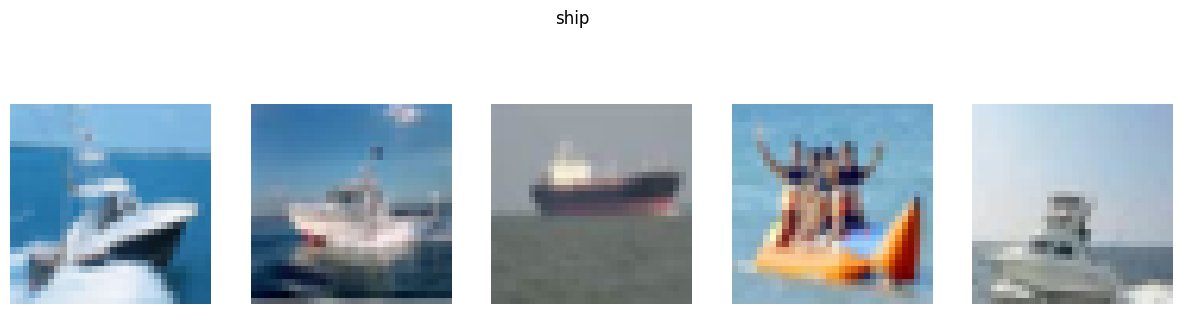

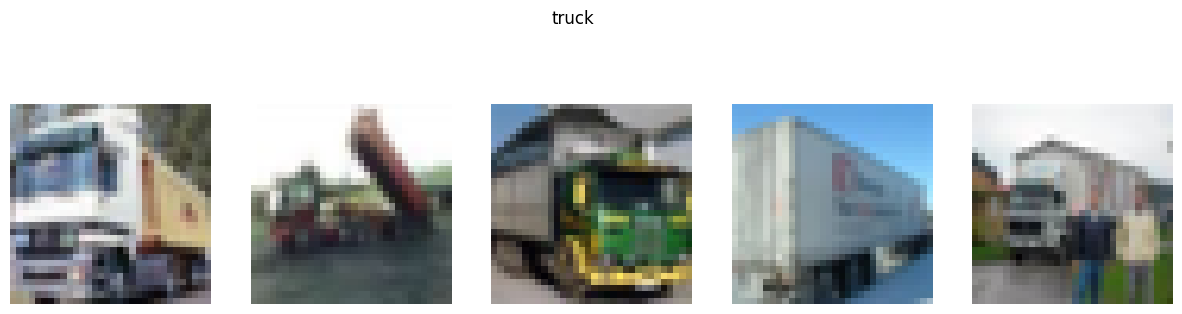

In [3]:
base_dir = r"C:\Users\aashutosh kumar\Videos\train"
classes = os.listdir(base_dir)
for j in classes:
    path = os.path.join(base_dir, j)
    images = os.listdir(path)
    plt.figure(figsize=(15,4))
    for index, img in enumerate(images[:5]):
        img_path = os.path.join(path, img)
        image = plt.imread(img_path)
        plt.suptitle(j)
        plt.subplot(1, 5, index + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()


**DATA-AUGUMENTATION**

In [29]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,  
                                   zoom_range=0.2,
                                   horizontal_flip=True,) 
  
val_datagen = ImageDataGenerator(rescale=1. / 255)

In [30]:
train_data = train_datagen.flow_from_directory(
    directory=r"C:\Users\aashutosh kumar\Videos\train",
    target_size=(32, 32),
    batch_size=64,
    class_mode='sparse'
)

val_data = val_datagen.flow_from_directory(
    directory=r"C:\Users\aashutosh kumar\Videos\test",
    target_size=(32, 32),
    batch_size=64,
    class_mode='sparse'
)

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [31]:
des = DenseNet201(include_top = False,weights = "imagenet",input_shape = (32,32,3))

**NORMALIZATION**

**MODEL BULDING**

In [35]:

model = Sequential()

model.add(des)

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

model.compile(metrics=["accuracy"],loss="sparse_categorical_crossentropy",optimizer="adam")

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1, 1, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

In [38]:
m=model.fit(train_data,epochs=12,validation_data=val_data)

Epoch 1/12
782/782 [==============================] - 578s 693ms/step - loss: 1.7204 - accuracy: 0.3991 - val_loss: 1.6258 - val_accuracy: 0.4692
Epoch 2/12
782/782 [==============================] - 108s 138ms/step - loss: 1.2531 - accuracy: 0.5848 - val_loss: 1.3629 - val_accuracy: 0.5265
Epoch 3/12
782/782 [==============================] - 111s 142ms/step - loss: 1.1902 - accuracy: 0.6101 - val_loss: 0.9491 - val_accuracy: 0.6829
Epoch 4/12
782/782 [==============================] - 113s 144ms/step - loss: 0.9667 - accuracy: 0.6926 - val_loss: 0.8799 - val_accuracy: 0.7087
Epoch 5/12
782/782 [==============================] - 110s 140ms/step - loss: 1.0623 - accuracy: 0.6587 - val_loss: 3.3061 - val_accuracy: 0.2898
Epoch 6/12
782/782 [==============================] - 105s 135ms/step - loss: 1.1743 - accuracy: 0.6164 - val_loss: 0.9694 - val_accuracy: 0.6655
Epoch 7/12
782/782 [==============================] - 100s 128ms/step - loss: 0.9882 - accuracy: 0.6836 - val_loss: 0.9524 -

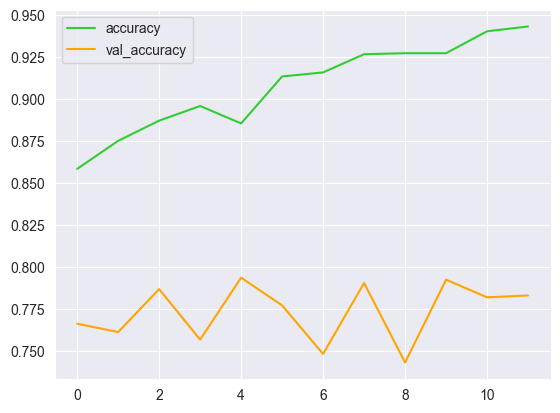

In [16]:
sns.set_style("darkgrid")
plt.plot(m.history["accuracy"],color = "limegreen")
plt.plot(m.history["val_accuracy"],color = "orange")
plt.legend(["accuracy","val_accuracy"])

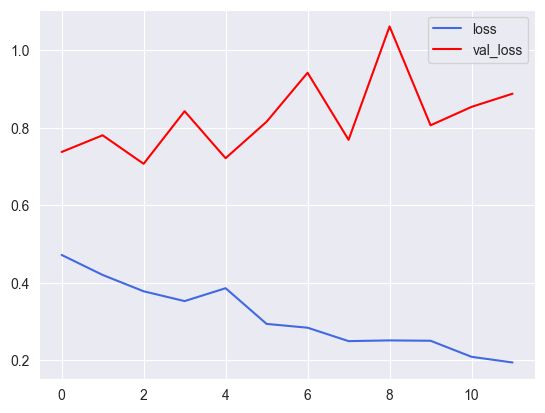

In [17]:
sns.set_style("darkgrid")
plt.plot(m.history["loss"],color = "royalblue")
plt.plot(m.history["val_loss"],color = "red")
plt.legend(["loss","val_loss"])

In [18]:
model.save("CIFAR.h5")

In [3]:
from keras.models import load_model

In [10]:
model_path = r"CIFAR.h5"
if os.path.exists(model_path):
    model = load_model(model_path)
    print("Model loaded")
else:
    print("Path does not exists")

Model loaded


**TESTING THE MODEL**

In [16]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

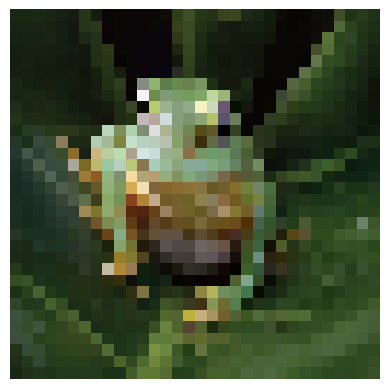

In [86]:
img = cv2.imread(r"C:\Users\aashutosh kumar\Downloads\frog.jpg")
img  = cv2.resize(img,(32,32))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = img/255.0
plt.imshow(img)
plt.axis('off')
plt.show()

In [87]:
img_input = img.reshape(1, 32, 32, 3)
result = model.predict(img_input)


1/1 [==============================] - 0s 48ms/step


In [88]:
predicted_class = np.argmax(result)
predicted_label = classes[predicted_class]
print("Predicted Label:", predicted_label)

Predicted Label: frog


**CLASSIFICATION METRICS**

In [4]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [11]:
y_true = np.concatenate([y for x, y in val_data], axis=0)
y_pred = np.concatenate([model.predict(x) for x, y in val_data], axis=0)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 7s 7s/step


In [12]:
cm = confusion_matrix(y_true, y_pred_classes)

Text(0.5, 1.0, 'Confusion Matrix')

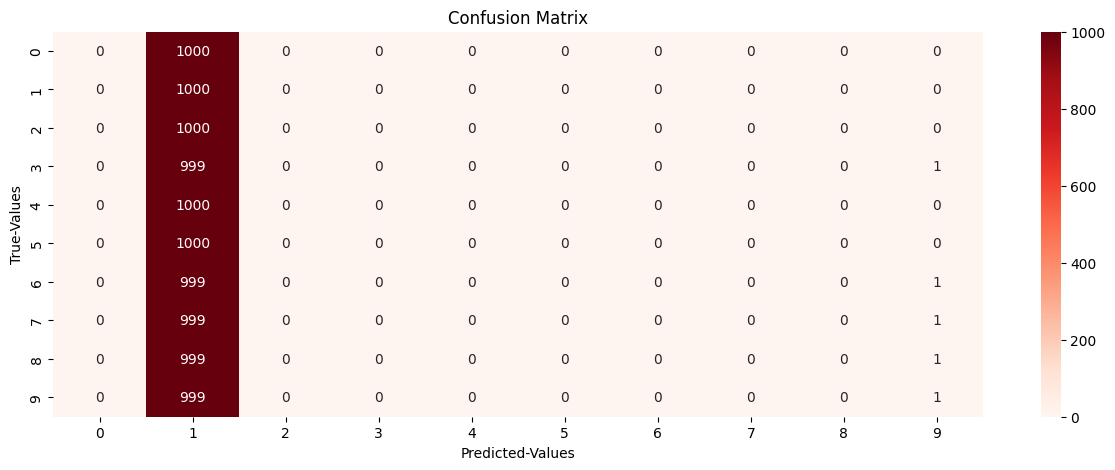

In [20]:
plt.figure(figsize=(15, 5))
sns.heatmap(cm, annot=True,fmt='d',cmap='Reds')
plt.xlabel("Predicted-Values")
plt.ylabel("True-Values")
plt.title("Confusion Matrix")

0.01838909137803479